In [2]:
from leagues.models import Competition,Season
from base_app.helpers import best_fuzzy_match
from metrics.helpers.infered_carry import infer_carries_with_confidence 
from games.models import Game
from base_app.models import ConfigItems,OptaEvents,OptaQualifier

from datetime import datetime
import pandas as pd
import numpy as np
import os
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [3]:
isl_seasons = Season.objects.filter(competition__id=5).order_by('-name')[:4]
base_location = ConfigItems.objects.get(key = "PREPARED_EVENT_PATH").value

In [4]:
valid_files = {}
for sns in isl_seasons:
    
    sns_path = f'{base_location}/{sns.competition.confederation}/{sns.competition.country.replace(" ","_")}/{sns.competition.competition_name.replace(" ","_")}/{sns.name.replace("/","-").replace(" ","_")}'
    if os.path.exists(sns_path):
        for a,b,files in os.walk(sns_path):
            valid_files[sns.name.replace("/","-").replace(" ","_")] = [os.path.join(a,f) for f in files]

    

In [5]:
example = valid_files['2024-2025'][0]
example

'D:/PreparedEvents/AFC/India/Indian_Super_League/2024-2025\\2796.xlsx'

In [6]:
df= pd.read_excel(example)
df.head(8)

,id,eventId,event_type,period,minute,seconds,team,outcome,x,y,timestamp,lastModified,qualifier,player_id,player_name,key_pass,assist,description,end_x,end_y,goal_mouth_y,goal_mouth_z,big_chance,own_goal,zone,xG,xGOT,momentum
0,2719332397,1,Team set up,Start,0,0,Mohun Bagan Super Giant,Successful,0.0,0.0,2024-09-13T12:55:43.598Z,2024-09-13T14:18:54Z,"[{'id': 5205708569, 'qualifierId': 131, 'value...",NaN,NaN,NaN,NaN,The qualifiers on this event show team lineup ...,0.0,0.0,0.0,0.0,False,False,NaN,NaN,NaN,NaN
1,2719332487,1,Team set up,Start,0,0,Mumbai City FC,Successful,0.0,0.0,2024-09-13T12:56:56.057Z,2024-09-13T14:35:12Z,"[{'id': 5205709139, 'qualifierId': 227, 'value...",NaN,NaN,NaN,NaN,The qualifiers on this event show team lineup ...,0.0,0.0,0.0,0.0,False,False,NaN,NaN,NaN,NaN
2,2719338593,2,Start,FirstHalf,0,0,Mumbai City FC,Successful,0.0,0.0,2024-09-13T14:01:01.391Z,2024-09-13T14:01:02Z,"[{'id': 5205744511, 'qualifierId': 127, 'value...",NaN,NaN,NaN,NaN,Start of a match period.,0.0,0.0,0.0,0.0,False,False,NaN,NaN,NaN,-16.0
3,2719338591,2,Start,FirstHalf,0,0,Mohun Bagan Super Giant,Successful,0.0,0.0,2024-09-13T14:01:01.391Z,2024-09-13T14:01:29Z,"[{'id': 5205744505, 'qualifierId': 127, 'value...",NaN,NaN,NaN,NaN,Start of a match period.,0.0,0.0,0.0,0.0,False,False,NaN,NaN,NaN,-16.0
4,2719338601,3,Pass,FirstHalf,0,0,Mohun Bagan Super Giant,Successful,49.9,50.0,2024-09-13T14:01:01.392Z,2024-09-13T14:36:37Z,"[{'id': 5205744541, 'qualifierId': 140, 'value...",ar6epfwqqob8wx8tra17jxkgl,D. Petratos,NaN,NaN,An attempt by one player to play the ball to a...,45.4,54.5,0.0,0.0,False,False,Back,NaN,NaN,-16.0
5,2719338603,4,Ball touch,FirstHalf,0,3,Mohun Bagan Super Giant,Unsuccessful,52.5,54.5,2024-09-13T14:01:05.360Z,2024-09-13T14:38:49Z,"[{'id': 5205744557, 'qualifierId': 56, 'value'...",1rsxl4rnswqez6c6rwp7768r9,G. Stewart,NaN,NaN,A player unsuccessfully controls the ball and ...,0.0,0.0,0.0,0.0,False,False,Center,NaN,NaN,-16.0
6,2719338605,3,Ball recovery,FirstHalf,0,6,Mumbai City FC,Successful,48.9,40.6,2024-09-13T14:01:07.687Z,2024-09-13T14:01:07Z,[],8ivkc4eqlrtucjitvl8fcgu6t,Jon Toral,NaN,NaN,A player gathers the ball and gains control of...,0.0,0.0,0.0,0.0,False,False,NaN,NaN,NaN,-16.0
7,2719338615,4,Pass,FirstHalf,0,10,Mumbai City FC,Successful,56.9,74.5,2024-09-13T14:01:11.751Z,2024-09-13T14:01:15Z,"[{'id': 5205744617, 'qualifierId': 1, 'qualifi...",8ivkc4eqlrtucjitvl8fcgu6t,Jon Toral,NaN,NaN,An attempt by one player to play the ball to a...,96.3,89.3,0.0,0.0,False,False,Left,NaN,NaN,-16.0


In [7]:
import numpy as np

# Karun Singh 12x8 xT Grid
xt_grid = np.array([
    [0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267, 0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312, 0.03485072, 0.0379259 ],
    [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719, 0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272, 0.04066992, 0.04647721],
    [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174, 0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202, 0.05491138, 0.06442595],
    [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646, 0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326, 0.10805102, 0.25745362],
    [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646, 0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326, 0.10805102, 0.25745362],
    [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174, 0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202, 0.05491138, 0.06442595],
    [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719, 0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272, 0.04066992, 0.04647721],
    [0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267, 0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312, 0.03485072, 0.0379259 ]
])
specific_columns = ['event_type','period','minute','seconds','team','outcome','player_name','x','y','end_x','end_y','xG','xGOT','momentum','x_bin','y_bin','end_x_bin','end_y_bin','start_xT','end_xT','diff_xT']


### 0. Add X/Y Bins and attach xT value

In [8]:
def enable_bins_and_add_xt_columns(df) :
    # 1. Create temporary Series
    temp_x = df['x'].fillna(-1)
    temp_y = df['y'].fillna(-1)
    temp_end_x = df['end_x'].fillna(-1)
    temp_end_y = df['end_y'].fillna(-1)
    
    # 2. Define "Out of Bounds" mask (outside 0-100)
    # This identifies both NaNs (which we set to -1) and actual out-of-bounds values
    is_invalid_start = (df['x'] <= 0) | (df['x'] > 100) | (df['y'] <= 0) | (df['y'] > 100) | df['x'].isna()
    is_invalid_end = (df['end_x'] <= 0) | (df['end_x'] > 100) | (df['end_y'] <= 0) | (df['end_y'] > 100) | df['end_x'].isna()
    
    # 3. Calculate indices using clip (to prevent index errors during the lookup)
    df['x_bin'] = np.clip((temp_x * 12 / 100).astype(int), 0, 11)
    df['y_bin'] = np.clip((temp_y * 8 / 100).astype(int), 0, 7)
    df['end_x_bin'] = np.clip((temp_end_x * 12 / 100).astype(int), 0, 11)
    df['end_y_bin'] = np.clip((temp_end_y * 8 / 100).astype(int), 0, 7)
    
    # 4. Map values from the grid
    df['start_xT'] = xt_grid[df['y_bin'], df['x_bin']]
    df['end_xT'] = xt_grid[df['end_y_bin'], df['end_x_bin']] # Corrected indexing
    
    # 5. Apply the 0.0 value to all invalid rows (NaN or Out of Bounds)
    df.loc[is_invalid_start, ['start_xT','x_bin','y_bin']] = [0.0,None,None]
    df.loc[is_invalid_end, ['end_xT','end_x_bin','end_y_bin']] = [0.0,None,None]
    
    # 6. Calculate Difference
    df['diff_xT'] = df['end_xT'] - df['start_xT']
    return df

In [9]:
DF = enable_bins_and_add_xt_columns(df)

In [10]:
carries = infer_carries_with_confidence(df).rename(columns={'start_x' : 'x',"start_y" : "y"})
C_DF = enable_bins_and_add_xt_columns(carries)

In [11]:
clean_df = DF[~DF['event_type'].astype(str).isin(['Team set up','Injury Time Announcement', 'End', 'Collection End' ,'nan','Start','Collection End','Deleted event',"Start delay","End delay",'Player Off','Player on','Offside Pass'])]

### 1a.Get Field tilt

In [272]:
def get_field_tilt_values(df):
    clean_df = df[~df['event_type'].astype(str).isin(['Team set up','Injury Time Announcement', 'End', 'Collection End' ,'nan','Start','Collection End','Deleted event',"Start delay","End delay",'Player Off','Player on'])]
    final_3rd_actions = clean_df[(clean_df['x'] >=66.0) & (clean_df['outcome'] == 'Successful') ]

    valid_actions = ["Pass","Ball recovery","Ball touch","Take On","Corner Awarded","Miss","Foul","Aerial","Goal","Interception"]
    team_actions = final_3rd_actions[final_3rd_actions['event_type'].isin(valid_actions)]
    total_actions = team_actions.shape[0]
    team_wise_actions = {k : round((v/total_actions)*100,2) for k,v in team_actions['team'].value_counts().to_dict().items()}
    return team_wise_actions

In [273]:
get_field_tilt_values(DF)

{'Mumbai City FC': 63.59, 'Mohun Bagan Super Giant': 36.41}

### 1b. Final 3rd Entries

In [274]:
def get_final_3rd_entires(df,c_df):
    clean_df = df[~df['event_type'].astype(str).isin(['Team set up','Injury Time Announcement', 'End', 'Collection End' ,'nan','Start','Collection End','Deleted event',"Start delay","End delay",'Player Off','Player on','Offside Pass'])]
    
    final_third_entries_pass = clean_df[(clean_df['x'] < 66) & (clean_df['end_x'] >=66)]
    final_third_entries_carry = c_df[(c_df['x'] < 66) & (C_DF['end_x'] >=66)]
    
    overall_pass = final_third_entries_pass.groupby(['team']).agg(
            xT_pass=('diff_xT', 
                      lambda x: x[final_third_entries_pass.loc[x.index, 'outcome'] == 'Successful'].sum()),
            total_actions=('outcome', "count"),
            successful_action=('outcome', lambda x: (x == 'Successful').sum()),
            failed_actions=('outcome', lambda x: (x != 'Successful').sum()),
    )
    overall_carry = final_third_entries_carry.groupby(['team']).agg(
            xT_carry=('diff_xT', "sum"),
            total_carries=('diff_xT', "count")
    )
    
    player_wise_pass = final_third_entries_pass.groupby(['team','player_name']).agg(
            xT_pass=('diff_xT', 
                      lambda x: x[final_third_entries_pass.loc[x.index, 'outcome'] == 'Successful'].sum()),
            total_actions=('outcome', "count"),
            successful_action=('outcome', lambda x: (x == 'Successful').sum()),
            failed_actions=('outcome', lambda x: (x != 'Successful').sum()),
    )
    player_wise_carry = final_third_entries_carry.groupby(['team','player_name']).agg(
            xT_carry=('diff_xT', "sum"),
            total_carries=('diff_xT', "count")
    )
    overall =  pd.merge(
        overall_pass,
        overall_carry,
        left_index=True,
        right_index=True,
        how='outer'
    ).fillna(0.0)

    player_wise = pd.merge(
        player_wise_pass,
        player_wise_carry,
        left_index=True,
        right_index=True,
        how='outer'
    ).fillna(0.0)

    overall['Total_xT'] = (overall['xT_pass'] + overall['xT_carry'])
    overall['xT_per_action'] = (overall['xT_pass'] / overall['total_actions'])
    player_wise['Total_xT'] = (player_wise['xT_pass'] + player_wise['xT_carry'])
    return overall,player_wise


In [124]:
overall_data,playerwise_data = get_final_3rd_entires(DF,C_DF)

In [275]:
overall_data

,xT_pass,total_actions,successful_action,failed_actions,xT_carry,total_carries,Total_xT,xT_per_action
team,,,,,,,,
Mohun Bagan Super Giant,0.161376,51,23,28,0.000000,0.0,0.161376,0.003164
Mumbai City FC,0.472856,71,49,22,0.011431,1.0,0.484286,0.006660


### 1c. Total Expected Threat and distribution

In [19]:
def get_pass_total_xt_and_info(df) :
    clean_df = df[~df['event_type'].astype(str).isin(['Team set up','Injury Time Announcement', 'End', 'Collection End' ,'nan','Start','Collection End','Deleted event',"Start delay","End delay",'Player Off','Player on'])]

    valid_actions = ["Pass", "Ball touch", "Take On"]
    
    xt_df = clean_df[(clean_df['event_type'].isin(valid_actions)) &(clean_df['outcome'] == 'Successful')].copy()
    xt_df['zone'] = 1
    xt_df.loc[xt_df['x'] < 33, 'zone'] = 0
    xt_df.loc[xt_df['x'] >= 66, 'zone'] = 2
    return xt_df.groupby('team').agg(
        total_actions=('diff_xT', 'count'),
    
        total_pos_actions=('diff_xT', lambda x: (x > 0).sum()),
        total_neg_actions=('diff_xT', lambda x: (x < 0).sum()),
        pos_def_action=('diff_xT', lambda x: x[(x > 0) & (xt_df.loc[x.index, 'zone'] == 0)].count()),
        neg_def_action=('diff_xT', lambda x: x[(x < 0) & (xt_df.loc[x.index, 'zone'] == 0)].count()),
        pos_mid_action=('diff_xT', lambda x: x[(x > 0) & (xt_df.loc[x.index, 'zone'] == 1)].count()),
        neg_mid_action=('diff_xT', lambda x: x[(x < 0) & (xt_df.loc[x.index, 'zone'] == 1)].count()),
        pos_att_action=('diff_xT', lambda x: x[(x > 0) & (xt_df.loc[x.index, 'zone'] == 2)].count()),
        neg_att_action=('diff_xT', lambda x: x[(x < 0) & (xt_df.loc[x.index, 'zone'] == 2)].count()),   
        total_xT=('diff_xT', 'sum'),
        pos_xT=('diff_xT', lambda x: x[x > 0].sum()),
        neg_xT=('diff_xT', lambda x: x[x < 0].sum()),
        pos_def_xt=('diff_xT', lambda x: x[(x > 0) & (xt_df.loc[x.index, 'zone'] == 0)].sum()),
        neg_def_xt=('diff_xT', lambda x: x[(x < 0) & (xt_df.loc[x.index, 'zone'] == 0)].sum()),
        pos_mid_xt=('diff_xT', lambda x: x[(x > 0) & (xt_df.loc[x.index, 'zone'] == 1)].sum()),
        neg_mid_xt=('diff_xT', lambda x: x[(x < 0) & (xt_df.loc[x.index, 'zone'] == 1)].sum()),
        pos_att_xt=('diff_xT', lambda x: x[(x > 0) & (xt_df.loc[x.index, 'zone'] == 2)].sum()),
        neg_att_xt=('diff_xT', lambda x: x[(x < 0) & (xt_df.loc[x.index, 'zone'] == 2)].sum()),
        
    )

In [20]:
get_pass_total_xt_and_info(clean_df)

,total_actions,total_pos_actions,total_neg_actions,pos_def_action,neg_def_action,pos_mid_action,neg_mid_action,pos_att_action,neg_att_action,total_xT,pos_xT,neg_xT,pos_def_xt,neg_def_xt,pos_mid_xt,neg_mid_xt,pos_att_xt,neg_att_xt
team,,,,,,,,,,,,,,,,,,
Mohun Bagan Super Giant,325,159,149,44,45,87,79,28,25,0.169140,1.011811,-0.842671,0.140847,-0.112596,0.309155,-0.257007,0.561809,-0.473067
Mumbai City FC,402,212,173,83,40,92,84,37,49,0.301145,1.917365,-1.616220,0.209355,-0.062880,0.540453,-0.265616,1.167557,-1.287724


### 1d.Progression Routes 

In [474]:
def assign_zone(x, y):
    """
    Spatial binning with variable vertical resolution:
    - Defensive & Middle thirds: Left / Central / Right
    - Final third: Wing / Half-space / Central
    """

    # --- Determine third ---
    if x < 33:
        third = "def"
    elif x < 66:
        third = "mid"
    else:
        third = "final"

    # --- Vertical bins ---
    if third in {"def", "mid"}:
        # coarse lanes
        if y < 33:
            lane = "left"
        elif y < 66:
            lane = "central"
        else:
            lane = "right"

    else:  # final third → full resolution
        if y < 20:
            lane = "left_wing"
        elif y < 40:
            lane = "left_half_space"
        elif y < 60:
            lane = "central"
        elif y < 80:
            lane = "right_half_space"
        else:
            lane = "right_wing"
    return f"{third}_{lane}"

def process_actions(df, min_dx):
    rows = []
    for _, r in df.iterrows():
        start_zone = assign_zone(r["x"], r["y"])
        end_zone = assign_zone(r["end_x"], r["end_y"])

        # Remove defensive-third recycling
        if start_zone.startswith("def_") and end_zone.startswith("def_"):
            continue

        # Enforce forward progression
        if r["end_x"] - r["x"] <= min_dx:
            continue

        # Ignore no spatial change
        if start_zone == end_zone:
            continue

        rows.append({
            "team": r["team"],
            "start_zone": start_zone,
            "end_zone": end_zone
        })
    return rows

In [475]:
def build_progression_df(events_df, carries_df, min_dx=5):
    """
    Build a progression DataFrame using adaptive spatial bins.
    """

    rows = []
    # ---- Passes ----
    passes = events_df[
        (events_df["event_type"] == "Pass") &
        (events_df["outcome"] == "Successful")
    ]
    rows.extend(process_actions(passes,min_dx))

    # ---- Carries ----
    rows.extend(process_actions(carries_df,min_dx))

    prog_df = pd.DataFrame(rows)

    summary = (
        prog_df
        .groupby(["team", "start_zone", "end_zone"])
        .size()
        .reset_index(name="count")
    )

    summary["pct_of_team"] = (
        summary["count"] /
        summary.groupby("team")["count"].transform("sum") * 100
    ).round(2)

    return summary


In [476]:
prog_df = build_progression_df(clean_df,C_DF)
prog_df

,team,start_zone,end_zone,count,pct_of_team
0,Mohun Bagan Super Giant,def_central,final_right_half_space,1,1.39
1,Mohun Bagan Super Giant,def_central,mid_central,3,4.17
2,Mohun Bagan Super Giant,def_central,mid_left,4,5.56
3,Mohun Bagan Super Giant,def_central,mid_right,5,6.94
4,Mohun Bagan Super Giant,def_left,mid_central,1,1.39
...,...,...,...,...,...
63,Mumbai City FC,mid_right,final_left_wing,3,2.65
64,Mumbai City FC,mid_right,final_right_half_space,3,2.65
65,Mumbai City FC,mid_right,final_right_wing,11,9.73
66,Mumbai City FC,mid_right,mid_central,2,1.77


In [477]:
def get_top_progression_zones(
    progression_df,
    top_n=5
):
    """
    Returns top N progression routes per team
    and how much % of total progression they explain.

    Expected columns in progression_df:
    ['team', 'start_zone', 'end_zone', 'count', 'pct_of_team']
    """

    # sort routes by importance within each team
    ranked = (
        progression_df
        .sort_values(["team", "pct_of_team"], ascending=[True, False])
        .copy()
    )

    # rank within team
    ranked["rank"] = (
        ranked
        .groupby("team")["pct_of_team"]
        .rank(method="first", ascending=False)
    )

    # keep top N
    top_routes = ranked[ranked["rank"] <= top_n]

    # compute cumulative share
    summary = (
        top_routes
        .groupby("team")
        .agg(
            top_routes_pct=("pct_of_team", "sum"),
            num_routes=("pct_of_team", "count")
        )
        .reset_index()
    )

    return top_routes, summary
top,summary = get_top_progression_zones(prog_df)

In [478]:
top

,team,start_zone,end_zone,count,pct_of_team,rank
26,Mohun Bagan Super Giant,mid_right,final_right_wing,7,9.72,1.0
8,Mohun Bagan Super Giant,def_right,mid_right,6,8.33,2.0
24,Mohun Bagan Super Giant,mid_left,mid_central,6,8.33,3.0
3,Mohun Bagan Super Giant,def_central,mid_right,5,6.94,4.0
5,Mohun Bagan Super Giant,def_left,mid_left,5,6.94,5.0
65,Mumbai City FC,mid_right,final_right_wing,11,9.73,1.0
32,Mumbai City FC,def_central,mid_left,8,7.08,2.0
54,Mumbai City FC,mid_central,final_right_wing,8,7.08,3.0
34,Mumbai City FC,def_left,mid_left,7,6.19,4.0
38,Mumbai City FC,def_right,mid_right,7,6.19,5.0


In [479]:
summary

,team,top_routes_pct,num_routes
0,Mohun Bagan Super Giant,40.26,5
1,Mumbai City FC,36.27,5


In [453]:
def routes_covering_threshold(progression_df, threshold=60):
    """
    Returns progression routes per team until cumulative pct_of_team
    crosses the given threshold.
    """

    results = []

    for team, g in progression_df.groupby("team"):
        g = g.sort_values("pct_of_team", ascending=False).reset_index(drop=True)
        g["cum_pct"] = g["pct_of_team"].cumsum()

        # take routes until threshold is crossed
        cutoff_idx = g[g["cum_pct"] >= threshold].index.min()
        selected = g.loc[:cutoff_idx]

        results.append(selected)

    return pd.concat(results, ignore_index=True)


routes = routes_covering_threshold(prog_df)
routes

,team,start_zone,end_zone,count,pct_of_team,cum_pct
0,Mohun Bagan Super Giant,mid_right,final_right_wing,7,9.72,9.72
1,Mohun Bagan Super Giant,mid_left,mid_central,6,8.33,18.05
2,Mohun Bagan Super Giant,def_right,mid_right,6,8.33,26.38
3,Mohun Bagan Super Giant,def_left,mid_left,5,6.94,33.32
4,Mohun Bagan Super Giant,def_central,mid_right,5,6.94,40.26
5,Mohun Bagan Super Giant,mid_central,mid_left,5,6.94,47.20
6,Mohun Bagan Super Giant,def_central,mid_left,4,5.56,52.76
7,Mohun Bagan Super Giant,def_right,mid_central,4,5.56,58.32
8,Mohun Bagan Super Giant,def_central,mid_central,3,4.17,62.49
9,Mumbai City FC,mid_right,final_right_wing,11,9.73,9.73


### 1e. Verticality Index

In [279]:
import pandas as pd
def compute_verticality_with_actions(
    df,
    min_x=20
):

    # Filter to successful passes in attacking phase
    passes = df[
        (df["event_type"] == "Pass") &
        (df["outcome"] == "Successful") &
        (df["x"] >= min_x)
    ].copy()

    # Forward distance
    passes["dx"] = passes["end_x"] - passes["x"]

    # Flag verticality
    passes["is_vertical"] = passes["dx"] > 2.5
    # Split actions
    vertical_actions = passes[passes["is_vertical"]].copy()
    non_vertical_actions = passes[~passes["is_vertical"]].copy()

    # Team-level verticality index
    verticality_index = (
        passes
        .groupby("team")
        .agg(
            vericalty_index = ("is_vertical","mean"),
            vertical_actions=("is_vertical", "sum"),     
            non_vertical_actions=("is_vertical", lambda x: (~x).sum()),
            
            avg_vertical_dist=("dx", lambda x: x[x > 2.5].mean()),
            median_vertical_dist=("dx",lambda x: x[x > 2.5].median()),
            max_vertical_dist=("dx",lambda x: x[x > 2.5].max()),
            
            avg_start_position=("x", lambda x: x[x > 20].mean()),
            median_start_position=("x",lambda x: x[x > 20].median()),

            avg_end_position=("end_x", lambda x: x[x > 20].mean()),
            median_end_position=("end_x",lambda x: x[x > 20].median()),
        )
    )

    return verticality_index


In [280]:
compute_verticality_with_actions(clean_df)

,vericalty_index,vertical_actions,non_vertical_actions,avg_vertical_dist,median_vertical_dist,max_vertical_dist,avg_start_position,median_start_position,avg_end_position,median_end_position
team,,,,,,,,,,
Mohun Bagan Super Giant,0.427536,118,158,11.514407,8.65,54.2,49.637319,46.2,52.287500,48.9
Mumbai City FC,0.482558,166,178,14.819880,12.00,55.2,48.238372,42.3,52.472508,46.7


### 1f. Width of Attack

In [481]:
def get_offensive_width(df) : 
    OFFENSIVE_EVENTS = {
        "Pass",
        "Take On",
        "Shot",
        "Goal",
        "Miss",
        "Attempt Saved"
    }
    offensive_df = clean_df[
        (
            clean_df["event_type"].isin(OFFENSIVE_EVENTS)
        ) &
        (
            (clean_df["outcome"] == "Successful") |
            (clean_df["event_type"].isin({"Shot", "Goal", "Miss", "Attempt Saved"}))
        )
    ].copy()
    # offensive_df = offensive_df[offensive_df["x"] >= 50]
    
    bins = [0, 20, 40, 60, 80, 100]
    labels = [
        "left_wing",
        "left_half_space",
        "central",
        "right_half_space",
        "right_wing"
    ]
    offensive_df["region"] = pd.cut(
        offensive_df["end_y"].fillna(offensive_df["y"]),
        bins=bins,
        labels=labels,
        include_lowest=True
    )
    bins = [0, 50, 100]
    labels = [
       "left","right"
    ]
    offensive_df["side"] = pd.cut(
        offensive_df["end_y"].fillna(offensive_df["y"]),
        bins=bins,
        labels=labels,
        include_lowest=True
    )
    width_usage = (
        offensive_df
        .groupby(["team", "region","side"],observed=True)
        .size()
        .reset_index(name="actions")
    )
    width_usage["region_presence"] = round((width_usage['actions'] /  width_usage.groupby("team",observed=True)["actions"].transform("sum"))*100,3)
    width_usage["side_presence"] = round((width_usage['actions'] /  width_usage.groupby(["team","side"],observed=True)["actions"].transform("sum"))*100,3)
    return width_usage


In [482]:
width_usage = get_offensive_width(clean_df)

In [483]:
width_usage

,team,region,side,actions,region_presence,side_presence
0,Mohun Bagan Super Giant,left_wing,left,92,29.206,57.500
1,Mohun Bagan Super Giant,left_half_space,left,49,15.556,30.625
2,Mohun Bagan Super Giant,central,left,19,6.032,11.875
3,Mohun Bagan Super Giant,central,right,33,10.476,21.290
4,Mohun Bagan Super Giant,right_half_space,right,49,15.556,31.613
5,Mohun Bagan Super Giant,right_wing,right,73,23.175,47.097
6,Mumbai City FC,left_wing,left,95,23.399,45.024
7,Mumbai City FC,left_half_space,left,85,20.936,40.284
8,Mumbai City FC,central,left,31,7.635,14.692
9,Mumbai City FC,central,right,28,6.897,14.359


##### !! Check with cosmetic changes

Mohun Bagan Super Giant


C:\Users\Hp\AppData\Local\Temp\ipykernel_8356\919671772.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



NameError: name 'value' is not defined

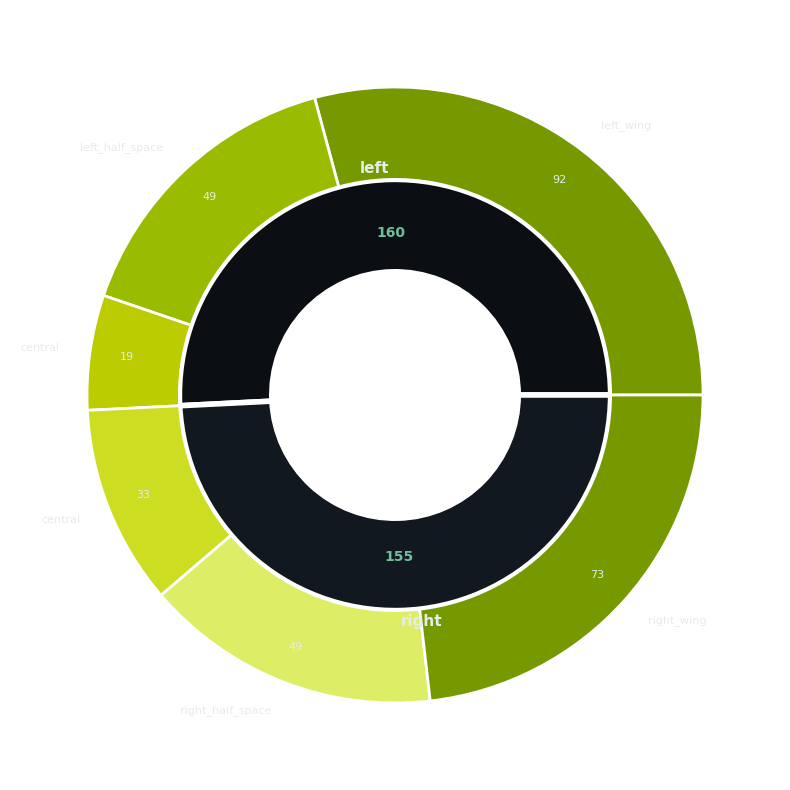

In [500]:
import matplotlib.pyplot as plt
import pandas as pd

def autopct_format(values):
    def inner(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f"{val}" if val > 0 else ""
    return inner

def plot_nested_sunburst(df):
    fig, ax = plt.subplots(figsize=(10, 10))
    size = 0.3  # Width of each ring
    
    # Aggregating data for hierarchy
    team_data = df.groupby('team')['actions'].sum()
    side_data = df.groupby(['team', 'side'])['actions'].sum()
    region_data = df['actions']

    team_colors = ['#CCFF00'] 
    
    # 2. Side Colors (Middle)
    # [MB Left Shade, MB Right Shade, Mumbai Left Shade, Mumbai Right Shade]
    side_colors = ['#0D0D0D', '#1A1A1A']
    side_colors = ["#0B0F14", "#121820"]
#     colors = [
#     "#0B0F14",  # primary background
#     "#121820",  # secondary background
#     "#16241C",  # dark surface (green tint)
#     "#1E3A2A",  # hover / container
#     "#2A5C44",  # active state
#     "#3F7F5F",  # primary accent
#     "#6FBF9A",  # highlight / success
# ]
    # 3. Region Colors (Outermost)
    # Array of 12 colors to match your 12 data rows exactly
    region_colors = [
        '#779900', '#99BB00', '#BBCC00', # MB Left Regions
        '#CCDD22', '#DDEE66'  # Mumbai Right Regions
    ]
    # Ring 1: Team (Center)
    # ax.pie(team_data, radius=1-2*size, labels=team_data.index, 
    #        labeldistance=0.3, wedgeprops=dict(width=size, edgecolor='black'))
    
    # Ring 2: Side (Middle)
    wedges, label_texts, value_texts = ax.pie(
        side_data,
        radius=1 - size,
        colors=side_colors,
        labels=side_data.index.get_level_values("side"),
        autopct=autopct_format(side_data.values),
        pctdistance=0.75,
        labeldistance=1.05,
        wedgeprops=dict(width=size, edgecolor="white", linewidth=4),
        textprops=dict(color="#E6ECEA", fontsize=11, fontweight="bold")
    )
    for t in value_texts:
        t.set_color("#6FBF9A")      # value color
        t.set_fontsize(10)
        t.set_fontweight("bold")

    
    # Ring 3: Region (Outer)
    wedges, labels, values = ax.pie(
    region_data,
    radius=1,
    labels=df['region'],
    colors=region_colors,
    autopct=autopct_format(region_data.values),
    pctdistance=0.88,
    wedgeprops=dict(width=size, edgecolor="white", linewidth=2),
    textprops=dict(color="#E6ECEA", fontsize=8)
    )
    for t in value:
        t.set_color("#323232")      # value color
        t.set_fontsize(10)
        t.set_fontweight("bold")



    ax.set(aspect="equal", title="Nested Action Distribution")
    plt.show()

for x in width_usage['team'].unique() : 
    print(x)
    plot_nested_sunburst(width_usage[width_usage['team'] == x])
    # break

### 1g. Centrality Analysis

In [463]:
def compute_centrality(df,carries):
    """
    Computes final-third half-space usage (left/right),
    Zone 14 usage, and Zone 14 xG / xGOT per team.
    """

    OFFENSIVE_EVENTS = {
        "Pass",
        "Carry",
        "Take On",
        "Shot",
        "Goal",
        "Miss",
        "Attempt Saved"
    }

    # --- Filter final-third offensive actions ---
    ft_1 = df[
        (df["event_type"].isin(OFFENSIVE_EVENTS)) &
        (
            (df["outcome"] == "Successful") |
            (df["event_type"].isin({"Shot", "Goal", "Miss", "Attempt Saved"}))
        )
    ].copy()
    
    ft = pd.concat([ft_1,carries])
    
    ft["end_x_use"] = ft["end_x"].fillna(ft["x"])
    ft["end_y_use"] = ft["end_y"].fillna(ft["y"])

    ft = ft[ft["end_x_use"] >= 66]

    # --- Spatial flags ---
    ft["left_half_space"] = ft["end_y_use"].between(20, 40)
    ft["right_half_space"] = ft["end_y_use"].between(60, 80)

    ft["any_half_space"] = ft["left_half_space"] | ft["right_half_space"]

    ft["zone14"] = (
        ft["end_x_use"].between(66, 83) &
        ft["end_y_use"].between(40, 60)
    )
    ft["zone14_xG"] = ft["xG"].where(ft["zone14"])
    ft["zone14_xGOT"] = ft["xGOT"].where(ft["zone14"])

    # --- Aggregate per team ---
    summary = (
        ft
        .groupby("team")
        .agg(
            total_final_third_actions=("team", "count"),
    
            left_half_space_actions=("left_half_space", "sum"),
            right_half_space_actions=("right_half_space", "sum"),
            total_half_space_actions=("any_half_space", "sum"),
    
            zone14_actions=("zone14", "sum"),
            zone14_xG=("zone14_xG", "sum"),
            zone14_xGOT=("zone14_xGOT", "sum"),
        )
        .reset_index()
    )

    summary["left_half_space_pct"] = (
        summary["left_half_space_actions"] /
        summary["total_final_third_actions"] * 100
    ).round(2)

    summary["right_half_space_pct"] = (
        summary["right_half_space_actions"] /
        summary["total_final_third_actions"] * 100
    ).round(2)

    summary["half_space_pct"] = (
        summary["total_half_space_actions"] /
        summary["total_final_third_actions"] * 100
    ).round(2)

    summary["zone14_pct"] = (
        summary["zone14_actions"] /
        summary["total_final_third_actions"] * 100
    ).round(2)

    return summary

compute_centrality(clean_df,C_DF)

,team,total_final_third_actions,left_half_space_actions,right_half_space_actions,total_half_space_actions,zone14_actions,zone14_xG,zone14_xGOT,left_half_space_pct,right_half_space_pct,half_space_pct,zone14_pct
0,Mohun Bagan Super Giant,65,9,14,23,1,0.0,0.0,13.85,21.54,35.38,1.54
1,Mumbai City FC,111,14,16,30,10,0.0,0.0,12.61,14.41,27.03,9.01


### 1.h Shooting Aggregate

In [522]:
def aggregate_shots_team_and_player(df):
    """
    Aggregates shot metrics at both team and player level.
    """

    SHOT_EVENTS = {"Shot", "Goal", "Miss", "Attempt Saved","Post"}

    shots = df[df["event_type"].isin(SHOT_EVENTS)].copy()

    # --- Flags ---
    shots["is_goal"] = (shots["event_type"] == "Goal") & (shots["own_goal"] ==False)
    shots["is_own_goal"] = shots["own_goal"]
    shots["on_target"] = shots["event_type"].isin({"Goal", "Attempt Saved"})

    def _aggregate(group_col):
        summary = (
            shots
            .groupby(group_col)
            .agg(
                shots=("event_type", "count"),
                goals=("is_goal", "sum"),
                own_goals=("own_goal", "sum"),
                shots_on_target=("on_target", "sum"),
                xG=("xG", "sum"),
                xGOT=("xGOT", "sum")
            )
            .reset_index()
        )
        if group_col == 'team':
            summary["goals_prevented"] = (summary["xGOT"] - summary["goals"]).round(3)
        else:
            summary["goals_added"] = (summary["xGOT"] - summary["xG"]).round(3)
        summary["shot_accuracy"] = (
            summary["shots_on_target"] / summary["shots"]
        ).round(3)

        summary["xG_per_shot"] = (
            summary["xG"] / summary["shots"]
        ).round(3)

        summary["xGOT_per_SOT"] = (
            summary["xGOT"] / summary["shots_on_target"]
        ).replace([np.inf, -np.inf], 0).round(3)

        return summary

    team_summary = _aggregate("team")
    player_summary = _aggregate(["player_name","player_id"])

    return team_summary, player_summary

t,p = aggregate_shots_team_and_player(clean_df)

In [524]:
p

,player_name,player_id,shots,goals,own_goals,shots_on_target,xG,xGOT,goals_added,shot_accuracy,xG_per_shot,xGOT_per_SOT
0,A. Rai,ck9nyxv100c1x24zxde7fx1t6,1,0,0,1,0.006318,0.000000,-0.006,1.0,0.006,0.000
1,A. Suryavanshi,1qthfdkbz92jucy9vpqimltec,1,0,0,1,0.006506,0.008580,0.002,1.0,0.007,0.009
2,Alberto Rodríguez,5hmx68vjqij9ywdv61v2qyrmy,1,1,0,1,0.032115,0.752804,0.721,1.0,0.032,0.753
3,B. Fernandes,7t90qi8vml1rdscbbwy0wbuuh,1,0,0,1,0.013018,0.043823,0.031,1.0,0.013,0.044
4,B. Singh,uuh0y713rzg940ai1bjs08ut,4,0,0,2,0.113681,0.218888,0.105,0.5,0.028,0.109
5,D. Petratos,ar6epfwqqob8wx8tra17jxkgl,1,0,0,1,0.017509,0.000000,-0.018,1.0,0.018,0.000
6,J. Manzorro,9orvnmyl9udr2yw618ckrir4l,1,0,0,0,0.027628,0.000000,-0.028,0.0,0.028,NaN
7,J. Rane,jewe7em2j8u4bw7xxbucebbp,1,0,0,0,0.030649,0.000000,-0.031,0.0,0.031,NaN
8,Jon Toral,8ivkc4eqlrtucjitvl8fcgu6t,1,0,0,1,0.045826,0.000000,-0.046,1.0,0.046,0.000
9,L. Chhangte,4caacpozfluk9p6ljrkzzo8o9,2,0,0,1,0.066838,0.089318,0.022,0.5,0.033,0.089


In [520]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# import plotly.io as pio

# def plot_sankey(df, team):
#     d = df[df["team"] == team]

#     zones = pd.unique(d[["start_zone", "end_zone"]].values.ravel())
#     zone_map = {z: i for i, z in enumerate(zones)}

#     fig = go.Figure(
#         go.Sankey(
#             node=dict(
#                 label=zones,
#                 pad=15,
#                 thickness=20
#             ),
#             link=dict(
#                 source=d["start_zone"].map(zone_map),
#                 target=d["end_zone"].map(zone_map),
#                 value=d["count"]
#             )
#         )
#     )

#     fig.update_layout(
#         title_text=f"Ball progression flows — {team}",
#         font_size=10
#     )
#     fig.show()
# plot_sankey(routes, "Mumbai City FC")

In [447]:
pio.renderers.default = "notebook_connected"
# pio.renderers.default = "iframe"
# pio.renderers.default = "browser"   # opens in browser


In [448]:
def plot_sankey_aligned(df, team):
    d = df[df["team"] == team].copy()

    def_zones = ["def_left", "def_central", "def_right"]
    mid_zones = ["mid_left", "mid_central", "mid_right"]
    final_zones = [
        "final_left_wing",
        "final_left_half_space",
        "final_central",
        "final_right_half_space",
        "final_right_wing"
    ]

    zones = def_zones + mid_zones + final_zones
    zone_map = {z: i for i, z in enumerate(zones)}

    x_positions = (
        [0.0] * len(def_zones) +
        [0.5] * len(mid_zones) +
        [1.0] * len(final_zones)
    )

    y_positions = (
        list(np.linspace(0.1, 0.9, len(def_zones))) +
        list(np.linspace(0.1, 0.9, len(mid_zones))) +
        list(np.linspace(0.1, 0.9, len(final_zones)))
    )

    fig = go.Figure(go.Sankey(
        arrangement="fixed",
        node=dict(
            label=zones,
            x=x_positions,
            y=y_positions,
            pad=15,
            thickness=20
        ),
        link=dict(
            source=d["start_zone"].map(zone_map),
            target=d["end_zone"].map(zone_map),
            value=d["count"]
        )
    ))

    fig.update_layout(
        title=f"Ball progression flows — {team}",
        height=550
    )

    fig.show()
plot_sankey_aligned(routes, "Mumbai City FC")

### Graveyard

In [137]:
# import numpy as np
# import pandas as pd

# def infer_carries_simple(
#     df,
#     min_dist=7,
#     max_dist=60,
#     max_time_gap=8
# ):
#     df = df.copy()

#     # numeric time (assumed sorted already)
#     if "ts_seconds" not in df.columns:
#         df["ts_seconds"] = df["minute"] * 60 + df["seconds"]

#     VALID_TOUCH = {"Pass", "Ball touch"}

#     # shift next-event info
#     df["next_team"] = df["team"].shift(-1)
#     df["next_player"] = df["player_name"].shift(-1)
#     df["next_outcome"] = df["outcome"].shift(-1)
#     df["next_x"] = df["x"].shift(-1)
#     df["next_y"] = df["y"].shift(-1)
#     df["next_time"] = df["ts_seconds"].shift(-1)

#     # distance + time
#     df["carry_dist"] = np.hypot(
#         df["next_x"] - df["x"],
#         df["next_y"] - df["y"]
#     )
#     df["time_gap"] = df["next_time"] - df["ts_seconds"]

#     # carry condition (CLEAN + LOCAL)
#     is_carry = (
#         (df["event_type"].isin(VALID_TOUCH)) &
#         (df["outcome"] == "Successful") &
#         (df["next_outcome"] == "Successful") &
#         (df["team"] == df["next_team"]) &
#         (df["player_name"] == df["next_player"]) &
#         (df["carry_dist"].between(min_dist, max_dist)) &
#         (df["time_gap"].between(0, max_time_gap))
#     )

#     carries = df.loc[is_carry].copy()

#     carries["event_type"] = "Carry"
#     carries["start_x"] = carries["x"]
#     carries["start_y"] = carries["y"]
#     carries["end_x"] = carries["next_x"]
#     carries["end_y"] = carries["next_y"]
#     carries["duration"] = carries["time_gap"]

#     return carries[[
#         "period",
#         "ts_seconds",
#         "team",
#         "player_name",
#         "event_type",
#         "start_x",
#         "start_y",
#         "end_x",
#         "end_y",
#         "carry_dist",
#         "duration"
#     ]]


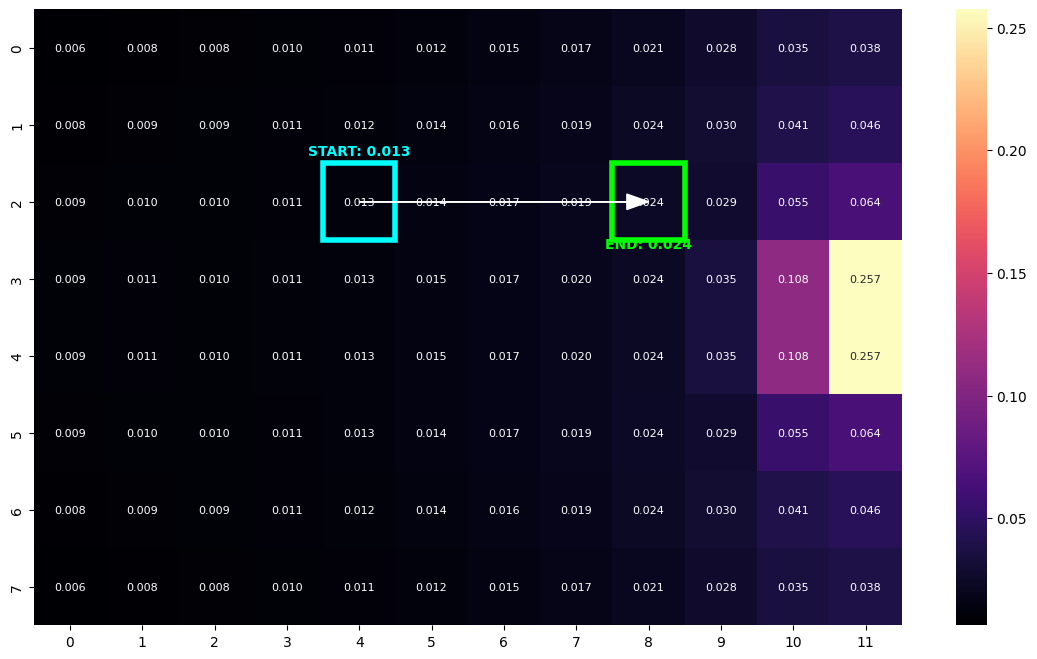

0.011430659999999999


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

def plot_xt_analysis(start, end, xt_grid, pitch_dims=(100, 100)):
    ny, nx = xt_grid.shape
    # Map raw coords to grid indices
    s_ix, s_iy = int((start[0]/pitch_dims[0])*nx), int((start[1]/pitch_dims[1])*ny)
    e_ix, e_iy = int((end[0]/pitch_dims[0])*nx), int((end[1]/pitch_dims[1])*ny)
    
    plt.figure(figsize=(18, 8))
    ax = sns.heatmap(xt_grid, annot=True, fmt=".3f", cmap="magma", annot_kws={"size": 8})
    
    # Highlight Bins
    ax.add_patch(Rectangle((s_ix, s_iy), 1, 1, fill=False, edgecolor='cyan', lw=4))
    ax.add_patch(Rectangle((e_ix, e_iy), 1, 1, fill=False, edgecolor='lime', lw=4))
    
    # Label Start/End values specifically
    plt.text(s_ix+0.5, s_iy-0.1, f"START: {xt_grid[s_iy, s_ix]:.3f}", color='cyan', weight='bold', ha='center')
    plt.text(e_ix+0.5, e_iy+1.1, f"END: {xt_grid[e_iy, e_ix]:.3f}", color='lime', weight='bold', ha='center')
    
    # Arrow
    plt.arrow(s_ix+0.5, s_iy+0.5, e_ix-s_ix, e_iy-s_iy, color='white', head_width=0.2, length_includes_head=True)
    plt.show()
    print(xt_grid[e_iy, e_ix] - xt_grid[s_iy, s_ix])
plot_xt_analysis((40.5,27.7),(66.8,26.5),xt_grid)